# Introduction to clustering

Clustering is a type of Unsupervised Learning that presumes that a dataset is unlabelled or that its inputs are not matched with predefined outputs. It uses various algorithms to sort through unlabeled data and provide groupings according to patterns it discerns in the data. 

## Introduction

In a professional setting, clustering can be used to determine things like market segmentation, determining what age groups buy what items, for example. Another use would be anomaly detection, perhaps to detect fraud from a dataset of credit card transactions. Or you might use clustering to determine tumors in a batch of medical scans. 

Think a minute about how you might have encountered clustering 'in the wild', in a banking, e-commerce, or business setting.

```{note}
Interestingly, cluster analysis originated in the fields of Anthropology and Psychology in the 1930s. Can you imagine how it might have been used?
```

Alternately, you could use it for grouping search results - by shopping links, images, or reviews, for example. Clustering is useful when you have a large dataset that you want to reduce and on which you want to perform more granular analysis, so the technique can be used to learn about data before other models are constructed.

## Getting started with clustering

Scikit-learn offers a large array of methods to perform clustering. The type you choose will depend on your use case. According to the documentation, each method has various benefits. Here is a simplified table of the methods supported by Scikit-learn and their appropriate use cases:

| Method name                  | Use case                                                               |
| :--------------------------- | :--------------------------------------------------------------------- |
| K-Means                      | general purpose, inductive                                             |
| Affinity propagation         | many, uneven clusters, inductive                                       |
| Mean-shift                   | many, uneven clusters, inductive                                       |
| Spectral clustering          | few, even clusters, transductive                                       |
| Ward hierarchical clustering | many, constrained clusters, transductive                               |
| Agglomerative clustering     | many, constrained, non Euclidean distances, transductive               |
| DBSCAN                       | non-flat geometry, uneven clusters, transductive                       |
| OPTICS                       | non-flat geometry, uneven clusters with variable density, transductive |
| Gaussian mixtures            | flat geometry, inductive                                               |
| BIRCH                        | large dataset with outliers, inductive                                 |

How we create clusters has a lot to do with how we gather up the data points into groups. Let's unpack some vocabulary:

**'Transductive' vs. 'inductive'**

Transductive inference is derived from observed training cases that map to specific test cases. Inductive inference is derived from training cases that map to general rules which are only then applied to test cases. 

An example: Imagine you have a dataset that is only partially  labelled. Some things are 'records', some 'cds', and some are blank. Your job is to provide labels for the blanks. If you choose an inductive approach, you'd train a model looking for 'records' and 'cds', and apply those labels to your unlabeled data. This approach will have trouble classifying things that are actually 'cassettes'. A transductive approach, on the other hand, handles this unknown data more effectively as it works to group similar items together and then applies a label to a group. In this case, clusters might reflect 'round musical things' and 'square musical things'. 

**'Non-flat' vs. 'flat' geometry'**
 
Derived from mathematical terminology, non-flat vs. flat geometry refers to the measure of distances between points by either 'flat' (Euclidean) or 'non-flat' (non-Euclidean) geometrical methods. 
'Flat' in this context refers to Euclidean geometry (parts of which are taught as 'plane' geometry), and non-flat refers to non-Euclidean geometry. What does geometry have to do with machine learning? Well, as two fields that are rooted in mathematics, there must be a common way to measure distances between points in clusters, and that can be done in a 'flat' or 'non-flat' way, depending on the nature of the data. Euclidean distances are measured as the length of a line segment between two points. Non-Euclidean distances are measured along a curve. If your data, visualized, seems to not exist on a plane, you might need to use a specialized algorithm to handle it.

```{figure} ../../../images/clustering/flat-nonflat.png
---
name: Flat vs Nonflat Geometry Infographic
---
Flat vs Nonflat Geometry Infographic by Dasani Madipalli
```

**Distances**

Clusters are defined by their distance matrix, e.g. the distances between points. This distance can be measured in a few ways. Euclidean clusters are defined by the average of the point values, and contain a 'centroid' or center point. Distances are thus measured by the distance to that centroid. Non-Euclidean distances refer to 'clustroids', the point closest to other points. Clustroids in turn can be defined in various ways.

**Constrained**

Constrained Clustering introduces 'semi-supervised' learning into this unsupervised method. The relationships between points are flagged as 'cannot link' or 'must-link' so some rules are forced on the dataset.

An example: If an algorithm is set free on a batch of unlabelled or semi-labelled data, the clusters it produces may be of poor quality. In the example above, the clusters might group 'round music things' and 'square music things' and 'triangular things' and 'cookies'. If given some constraints, or rules to follow ("the item must be made of plastic", "the item needs to be able to produce music") this can help 'constrain' the algorithm to make better choices.

**Density**

Data that is 'noisy' is considered to be 'dense'. The distances between points in each of its clusters may prove, on examination, to be more or less dense, or 'crowded' and thus this data needs to be analyzed with the appropriate clustering method. This article demonstrates the difference between using K-Means clustering vs. HDBSCAN algorithms to explore a noisy dataset with uneven cluster density.


## Clustering algorithms

There are over 100 clustering algorithms, and their use depends on the nature of the data at hand. Let's discuss some of the major ones:

- **Hierarchical clustering**. If an object is classified by its proximity to a nearby object, rather than to one farther away, clusters are formed based on their members' distance to and from other objects. Scikit-learn's agglomerative clustering is hierarchical.

```{figure} ../../../images/clustering/hierarchical.png
---
name: Hierarchical clustering Infographic
---
Hierarchical clustering Infographic by Dasani Madipalli
```

- **Centroid clustering**. This popular algorithm requires the choice of 'k', or the number of clusters to form, after which the algorithm determines the center point of a cluster and gathers data around that point. K-means clustering is a popular version of centroid clustering. The center is determined by the nearest mean, thus the name. The squared distance from the cluster is minimized.

```{figure} ../../../images/clustering/centroid.png
---
name: Centroid clustering Infographic
---  
Centroid clustering Infographic by Dasani Madipalli
```

- **Distribution-based clustering**. Based in statistical modeling, distribution-based clustering centers on determining the probability that a data point belongs to a cluster, and assigning it accordingly. Gaussian mixture methods belong to this type.

- **Density-based clustering**. Data points are assigned to clusters based on their density, or their grouping around each other. Data points far from the group are considered outliers or noise. DBSCAN, Mean-shift and OPTICS belong to this type of clustering.

- **Grid-based clustering**. For multi-dimensional datasets, a grid is created and the data is divided amongst the grid's cells, thereby creating clusters.

## Exercise - cluster your data

Clustering as a technique is greatly aided by proper visualization, so let's get started by visualizing our music data. This exercise will help us decide which of the methods of clustering we should most effectively use for the nature of this data.

1. Open the _notebook.ipynb_ file in this folder.

2. Import the `Seaborn` package for good data visualization.

```bash
!pip install seaborn
```

3. Append the song data from _nigerian-songs.csv_. Load up a dataframe with some data about the songs. Get ready to explore this data by importing the libraries and dumping out the data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../../assets/data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


Check the first few lines of data:

4. Get some information about the dataframe, calling `info()`:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

5. Double-check for null values, by calling `isnull()` and verifying the sum being 0:

In [3]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

6. Describe the data:

In [4]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


```{note}
If we are working with clustering, an unsupervised method that does not require labeled data, why are we showing this data with labels? In the data exploration phase, they come in handy, but they are not necessary for the clustering algorithms to work. You could just as well remove the column headers and refer to the data by column number. 
```

Look at the general values of the data. Note that popularity can be '0', which show songs that have no ranking. Let's remove those shortly.

7. Use a barplot to find out the most popular genres:

Text(0.5, 1.0, 'Top genres')

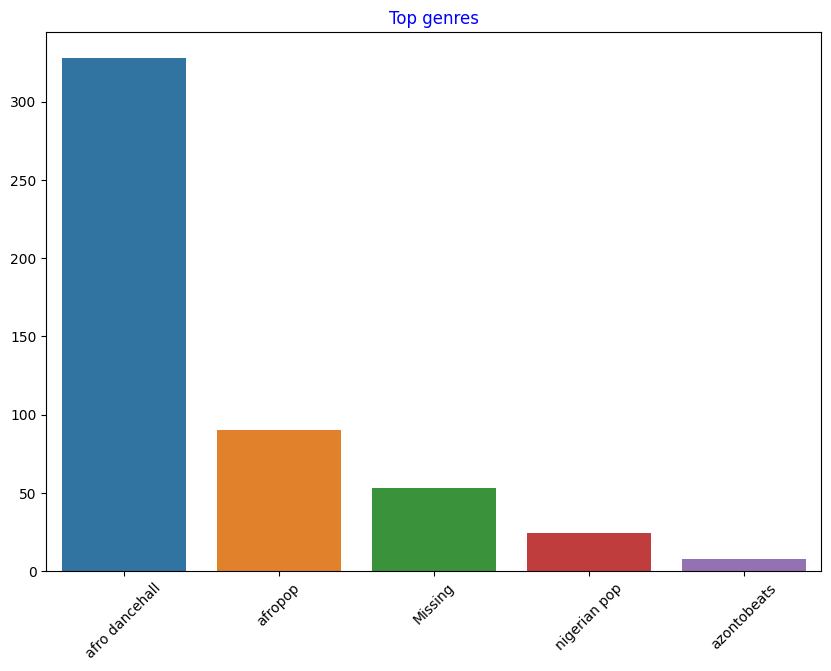

In [5]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

```{note}
If you'd like to see more top values, change the top `[:5]` to a bigger value, or remove it to see all.
```

Note, when the top genre is described as 'Missing', that means that Spotify did not classify it, so let's get rid of it.

8. Get rid of missing data by filtering it out

Text(0.5, 1.0, 'Top genres')

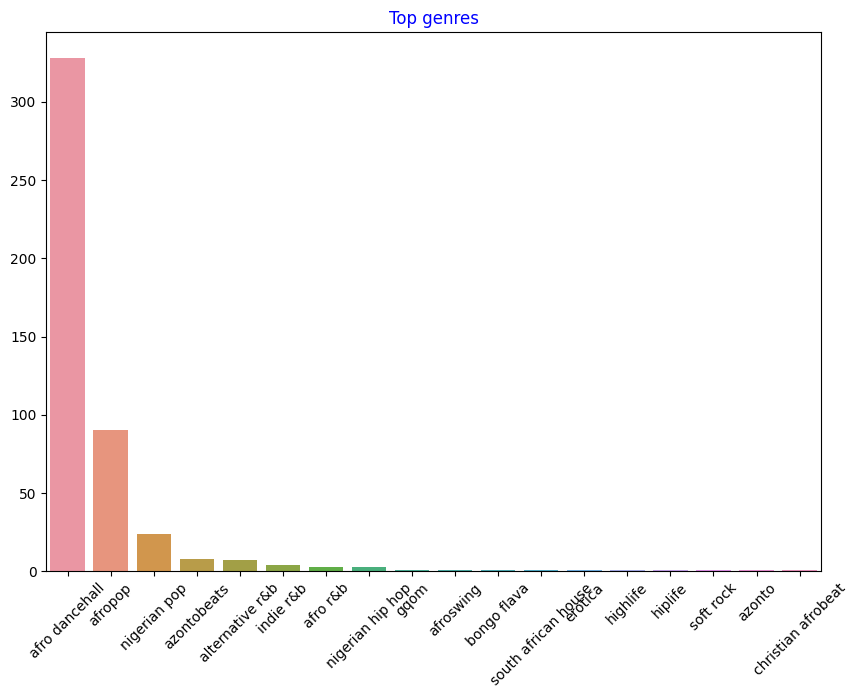

In [6]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

9. By far, the top three genres dominate this dataset. Let's concentrate on `afro dancehall`, `afropop`, and `nigerian pop`, additionally filter the dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered noise for our purposes):

Text(0.5, 1.0, 'Top genres')

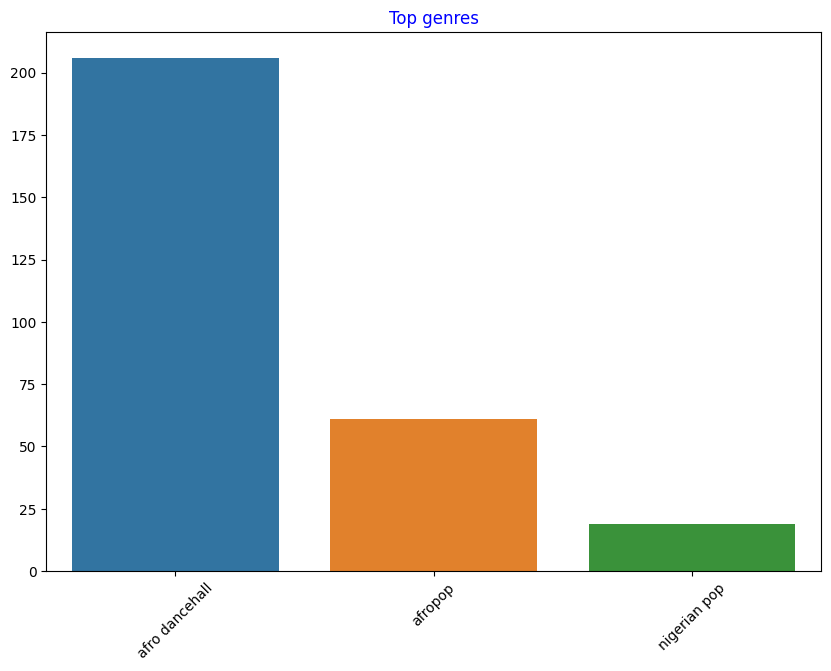

In [7]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

10. Do a quick test to see if the data correlates in any particularly strong way:

/tmp/ipykernel_4540/3182244363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<AxesSubplot: >

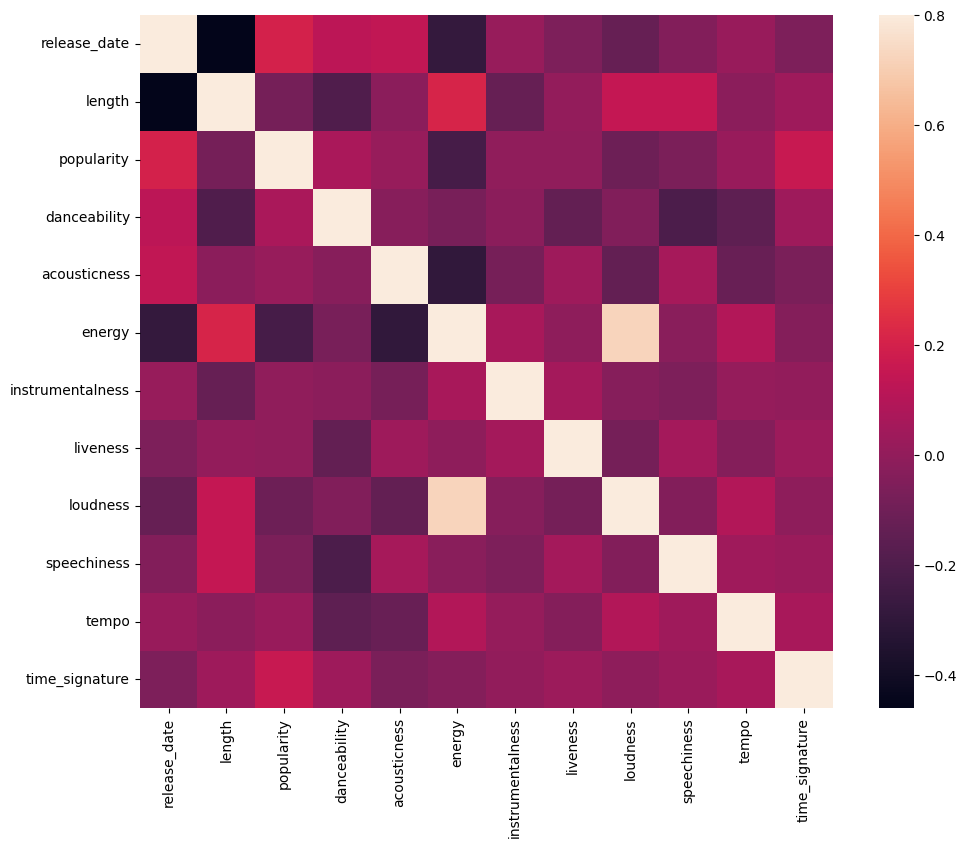

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

The only strong correlation is between `energy` and `loudness`, which is not too surprising, given that loud music is usually pretty energetic. Otherwise, the correlations are relatively weak. It will be interesting to see what a clustering algorithm can make of this data.

```{note}
Note that correlation does not imply causation! We have proof of correlation but no proof of causation. An amusing web site has some visuals that emphasize this point.
```

Is there any convergence in this dataset around a song's perceived popularity and danceability? A FacetGrid shows that there are concentric circles that line up, regardless of genre. Could it be that Nigerian tastes converge at a certain level of danceability for this genre?  

Try different datapoints (energy, loudness, speechiness) and more or different musical genres. What can you discover? Take a look at the `df.describe()` table to see the general spread of the data points.

### Exercise - data distribution

Are these three genres significantly different in the perception of their danceability, based on their popularity?

1. Examine our top three genres data distribution for popularity and danceability along a given x and y axis.

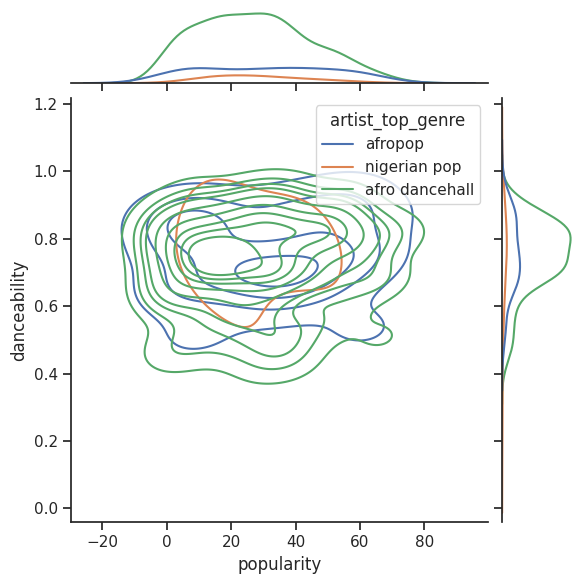

In [9]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

You can discover concentric circles around a general point of convergence, showing the distribution of points.

```{note}
Note that this example uses a KDE (Kernel Density Estimate) graph that represents the data using a continuous probability density curve. This allows us to interpret data when working with multiple distributions.
```

In general, the three genres align loosely in terms of their popularity and danceability. Determining clusters in this loosely-aligned data will be a challenge:

2. Create a scatter plot:

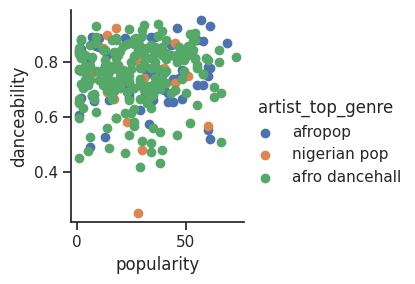

In [10]:
sns.FacetGrid(df, hue="artist_top_genre") \
    .map(plt.scatter, "popularity", "danceability") \
    .add_legend()

    A scatterplot of the same axes shows a similar pattern of convergence

In general, for clustering, you can use scatterplots to show clusters of data, so mastering this type of visualization is very useful. In the next section, we will take this filtered data and use k-means clustering to discover groups in this data that see to overlap in interesting ways.

---

## Your turn! 🚀

[Research other visualizations for clustering](../../assignments/ml-advanced/clustering/research-other-visualizations-for-clustering.md)

## Self study

Before you apply clustering algorithms, as we have learned, it's a good idea to understand the nature of your dataset.There are several resources available. 

- [right clustering algorithm](https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html)
- [clustering algorithms behave](https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/) 

## Acknowledgments

Thanks to Microsoft for creating the open-source course [Machine Learning for Beginners](https://github.com/microsoft/ML-For-Beginners). It inspires the majority of the content in this chapter.